Coderby 4
<font size="5" color="red"><b>ch2. 군집분석</b></font>
# 1절. 군집모델(클러스터링)
-클러스터(cluster) : 독립변수의특성이유사한데이터의그룹
-클러스터링(clustering) : 주어진데이터를여러개의클러스터로구분하는것
1) 중심기반클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) 연결기반클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">
3) 밀도기반클러스터링(DBSCAN의변형으로OPTICS) : https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
# sklearn의 로직들이 멀티 스레드로 실행 => 단일스레드 작업을 하도록

# 2절 K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 클러스터의 중심을 찾아가는 알고리즘
- 세부알고리즘 : 교안6p

In [2]:
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'
# 한글설정
plt.rc('font',family='Malgun Gothic') # windows
plt.rc('axes', unicode_minus=False) # 축의 '-' 깨짐 방지

In [32]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, # 데이터 갯수(기본값 100)
                           n_features=2, # 독립변수갯수(기본값 20)
                           n_informative=2,  # 종속변수에 영향을 미치는 독립변수 갯수(기본값 2)
                           n_redundant=0,    # 종속변수에 영향을 안미치는 독립변수 갯수(기본값 2)
                           n_classes=2,   # 종속변수의 클래스 수                    
                           n_clusters_per_class=1, # 각 종속변수 그룹별 서브 그룹 수
                           random_state=123
                           )
import numpy as np
np.c_[X,y][:3]

array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

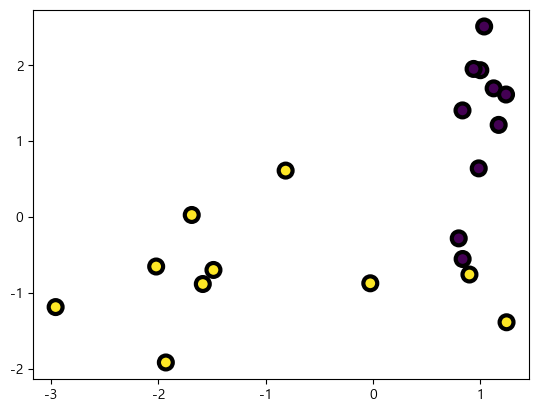

In [34]:
plt.scatter(x = X[:, 0], y= X[:,1], c=y, s=100, edgecolors='k', lw=3)

In [40]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, #군의 갯수
                init='k-means++', # 초기 중심점을 서로 멀리 초기화 random(중심점랜덤)
                n_init=10, # 각 다른 초기값을 10번 실행해보고 가장 좋은 모델 선택
                max_iter=300 # 각 실행에서 300번 반복 (중심 옮기기)
                )
model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [64]:
c0, c1 = model.cluster_centers_  # 모델이 최종적으로 정한 중심점

In [61]:
print('모델라벨',model.labels_)
pred = model.predict(X)
print('예 측 값', pred)
print('실 제 값', y)

모델라벨 [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
예 측 값 [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
실 제 값 [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


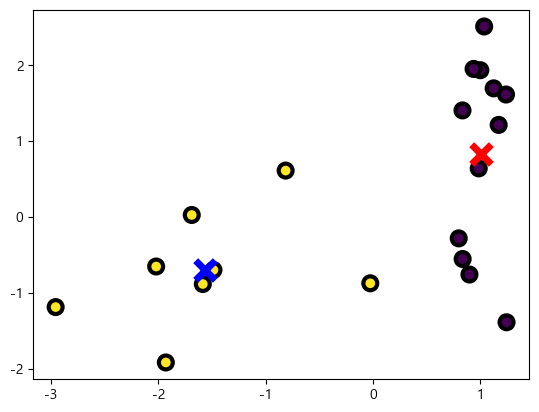

In [66]:
plt.scatter(x = X[:, 0], y= X[:,1], c=pred, s=100, edgecolors='k', lw=3)
plt.scatter(x=c0[0], y=c0[1], s=200, marker='x', lw=5, c='r')
plt.scatter(x=c1[0], y=c1[1], s=200, marker='x', lw=5, c='b')

## cf. Normalizer 적용

In [69]:
import pandas as pd
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667],
       [ 0.90134424, -0.75896558,  0.76493676, -0.64410538],
       [ 0.83653082,  1.40488232,  0.51161542,  0.85921456],
       [-0.02317631, -0.87481215, -0.02648361, -0.99964925],
       [ 0.83780453, -0.554389  ,  0.83395074, -0.55183889],
       [-1.9295722 , -1.91894047, -0.7090575 , -0.70515067],
       [-0.8124957 ,  0.61140818, -0.79903769,  0.60128094],
       [ 1.12694685,  1.69570061,  0.55350265,  0.83284742],
       [ 0.80138648, -0.28232585,  0.94318094, -0.33227958],
       [ 0.9399586 ,  1.9518949 ,  0.43387458,  0.90097328],
       [ 1.24232232,  1.6146173 ,  0.60980605,  0.79255068],
       [-1.48554751, -0.69890985, -0.90485891, -0.42571159],
       [ 1.24732102, -1.38872822,  0.66821427, -0.74396888],
       [-2.95714561, -1.18843377, -0.92787221, -0.37289833],
       [-1.5849172 , -0.

In [72]:
model = KMeans(n_clusters=2, #군의 갯수
                init='k-means++', # 초기 중심점을 서로 멀리 초기화 random(중심점랜덤)
                n_init=10, # 각 다른 초기값을 10번 실행해보고 가장 좋은 모델 선택
                max_iter=300 # 각 실행에서 300번 반복 (중심 옮기기)
                )
model.fit(Xnor)

KMeans(n_clusters=2, n_init=10)

In [74]:
model.labels_

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
d0, d1 = model.cluster_centers_

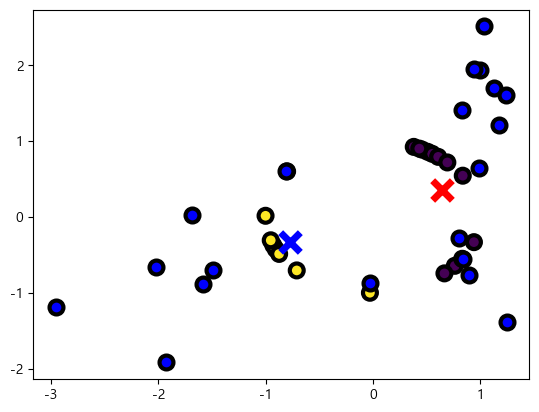

In [82]:
plt.scatter(x = Xnor[:, 0], y= Xnor[:,1], c=pred, s=100, edgecolors='k', lw=3)
plt.scatter(x = X[:, 0], y= X[:,1], c='b', s=100, edgecolors='k', lw=3)
plt.scatter(x=d0[0], y=d0[1], s=200, marker='x', lw=5, c='r')
plt.scatter(x=d1[0], y=d1[1], s=200, marker='x', lw=5, c='b')

### K-Means 클러스터링의 한계점(pt13)
- 군의 특성이 다를 경우
    - 크기
    - 군의 밀도
    - 비구형
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링

### 군의 크기가 다른 경우

In [145]:
np.random.seed(0)
# 평균 -10, 표준편차 2 인 10행 2열 데이터 : group0 
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(group0.shape[0],0)
group0 = np.c_[group0, y]
group0[:3]

array([[ -6.47189531,  -9.19968558,   0.        ],
       [ -8.04252403,  -5.5182136 ,   0.        ],
       [ -6.26488402, -11.95455576,   0.        ]])

In [146]:
# 평균 10, 표준편차 2 인 10행 2열 데이터 : group1
group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(group1.shape[0],1)
group1 = np.c_[group1, y]
group1[:3]

array([[ 4.89402037, 11.30723719,  1.        ],
       [11.7288724 ,  8.51566996,  1.        ],
       [14.53950925,  7.09126865,  1.        ]])

In [147]:
# 평균 0, 표준편차 5 인 100행 2열 데이터 : group2 
group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(group2.shape[0],2)
group2 = np.c_[group2, y]
group2[:3]

array([[-5.24276483, -7.10008969,  2.        ],
       [-8.53135095,  9.75387698,  2.        ],
       [-2.54826091, -2.19037151,  2.        ]])

In [148]:
data = np.r_[group0, group1, group2]
data[::20], data.shape

(array([[-6.47189531, -9.19968558,  0.        ],
        [-5.24276483, -7.10008969,  2.        ],
        [-5.8257492 ,  4.50413243,  2.        ],
        [ 1.88212766, -5.49700395,  2.        ],
        [-2.49016225,  9.64766027,  2.        ],
        [-1.84590919, -1.19689589,  2.        ]]),
 (120, 3))

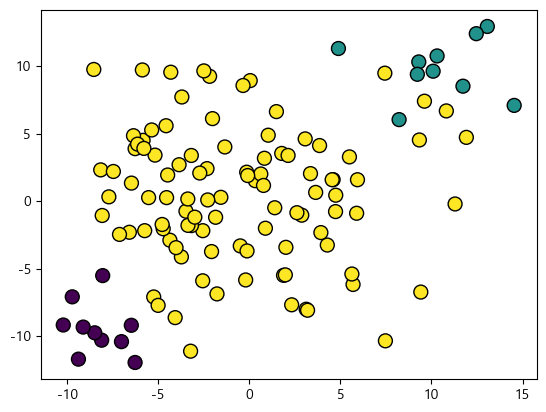

In [149]:
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2], s=100, edgecolors='k')

In [155]:
model = KMeans(n_clusters=3,
               init='k-means++',
               n_init='auto',
               )
model.fit(data[:,:2])

KMeans(n_clusters=3, n_init='auto')

In [157]:
c = model.cluster_centers_
c

array([[-3.23795138,  3.79797742],
       [ 7.93234415,  5.526175  ],
       [-2.11638402, -5.40013046]])

In [ ]:
print(model.labels_) # 모델이 클러스터링 한 결과
print(model.predict(data[:,:2])) # 모델이 클러스터링 한 결과
pred = model.labels_

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 1 2
 2 2 0 0 2 1 1 0 0 0 0 0 0 2 0 0 2 1 1 0 0 1 1 2 0 0 0 1 0 0 0 2 2 0 0 1 0
 2 0 2 2 2 2 0 1 0 2 1 1 2 0 2 0 2 2 2 0 0 0 2 2 1 1 2 1 2 2 2 1 2 2 0 1 2
 0 0 0 2 2 0 0 2 0]
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 1 2
 2 2 0 0 2 1 1 0 0 0 0 0 0 2 0 0 2 1 1 0 0 1 1 2 0 0 0 1 0 0 0 2 2 0 0 1 0
 2 0 2 2 2 2 0 1 0 2 1 1 2 0 2 0 2 2 2 0 0 0 2 2 1 1 2 1 2 2 2 1 2 2 0 1 2
 0 0 0 2 2 0 0 2 0]


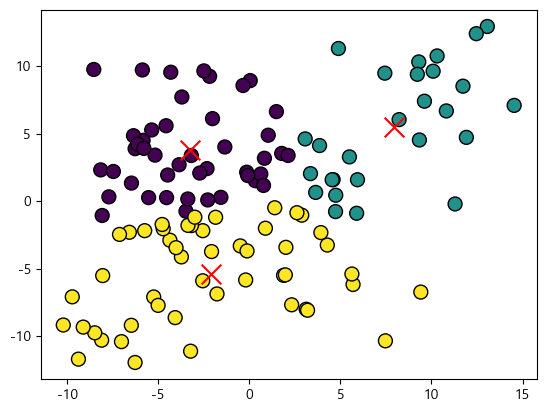

In [169]:
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100, edgecolors='k')
plt.scatter(x=c[:,0], y=c[:,1], c='r', marker='x', s=200)

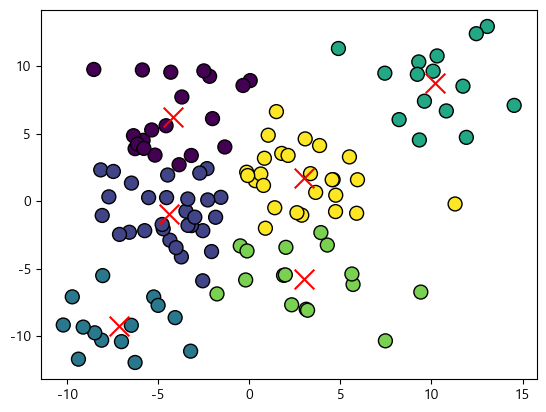

In [170]:
model = KMeans(n_clusters=6,
               init='k-means++',
               n_init='auto',
               )
model.fit(data[:,:2])

c = model.cluster_centers_
pred = model.labels_

plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100, edgecolors='k')
plt.scatter(x=c[:,0], y=c[:,1], c='r', marker='x', s=200)

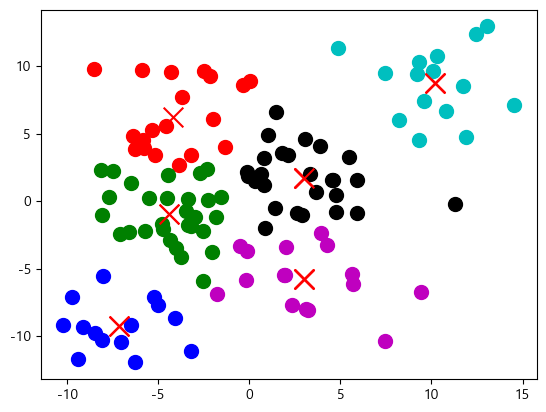

In [184]:
colors = ['r','g','b','c','m','k'] #
for i in range(6):
    plt.scatter(x=data[pred==i,0], y=data[pred==i,1], c=colors[i], s=100)
    plt.scatter(x=c[i:,0], y=c[i:,1], c='r', marker='x', s=200)

# 3절 Hierachical 클러스터링(계층적 군집)
- 계층적분석(linkage) -> dendrogram -> fculster를 이용해서 클러스터를 생성(군집화)
    - 군끼리 묶으면서 최종적으로 하나의 군집이 될 때까지 묶는 클러스터링
    - 군집의 수를 미리 정해주지 않음
    - 군집간의 거리 기반으로 클러스터링

In [189]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
133,6.3,2.8,5.1,1.5,virginica


In [190]:
# 계층적 군집 적용을 위해 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)

In [192]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [193]:
from scipy.cluster.hierarchy import linkage
# method : 거리계산을 어떻게 할지
# method = 'complete' : 두 클러스터에 가장 먼 거리를 이용
# method = 'single' : 두 클러스터에 거정 가까운 거리를 이용
# method = 'average' : 두 클러스터내의 각 점에서 다른 클러스터의 모든 점의 평균 거리를 이용
cluster_model = linkage(iris, method='complete')

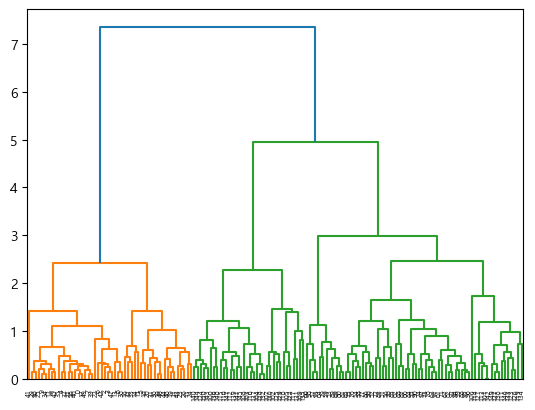

In [196]:
from scipy.cluster.hierarchy import dendrogram
dendrogram(cluster_model, labels=iris.index)
plt.savefig('data/ch02_iris.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster # 군집화
fcluster(cluster_model, 
         t=4, # dendrogram의 y축의 값
         criterion='distance' # 일 때 t값은 dendrogram의 y축 값
         )

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [ ]:
fcluster(cluster_model,
         t=3,
         criterion='maxclust') # 일 때 t 값은 클러스터의 갯수

# 4절 DBSCAN 클러스터링
- 연결 기반(밀도기반) 군집화 알고리즘(이상치를 자동 감지)
- 단점 : 클러스터의 밀도가 일정하지 않으면 성능이 낮아짐

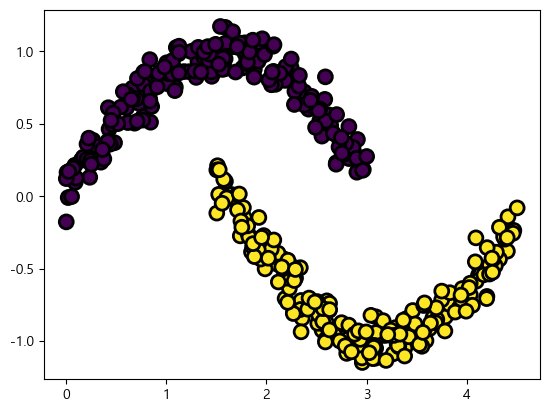

In [214]:
X1 = np.random.rand(200)*3 # 0 <= X1 < 3 의 실수 난수 200개
noise = np.random.normal(0, 0.1, 200)
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1, np.full(200,0)]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(200,1)]

data = np.r_[group1, group2]
plt.scatter(x=data[:,0],y=data[:,1], c=data[:,2], s=100, edgecolors='k', lw=2)

In [216]:
from sklearn.cluster import DBSCAN
# 반경 0.3 이내에 최소 10개는 있어야 군집 시작
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(data)

DBSCAN(eps=0.3, min_samples=10)

In [232]:
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_noise = list(labels).count(-1)
print('군집 갯수',n_clusters, '\n이상치 갯수',n_noise)

군집 갯수 2 
이상치 갯수 0


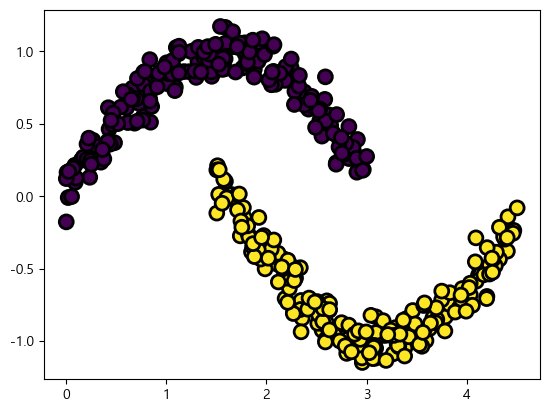

In [233]:
plt.scatter(x=data[:,0],y=data[:,1], c=labels, s=100, edgecolors='k', lw=2)

# 5절 Scikit-learn의 모형 성능 평가 방법
- score 메소드를 통해 예측 모형 평가(분류, 회귀. 군집에서는 안 씀)
- metrics 모듈의 메소드를 통해 모형 평가
## 5.1 metrics 함수이용
    - 클러스터의 소속과 갯수를 모두 알고 있을 겨우 평가
    


In [236]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [237]:
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]
iris_X.shape, iris_y.shape

((150, 4), (150,))

In [238]:
iris_model3 = KMeans(n_clusters=3, n_init=10)
iris_model3.fit(iris_X)

KMeans(n_clusters=3, n_init=10)

In [240]:
pred = iris_model3.labels_
pred = iris_model3.predict(iris_X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [ ]:
# pred 조정을 위해 : np.choose(배열시퀀스, 배열)
np.choose(iris_model3.labels_, [0,2,1])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [260]:
# 3 개 cluster로 군집화한 자료
print('실제값 :', iris_y[::50] )
print('예측값 :', iris_model3.predict(iris_X)[::50])

실제값 : 0      0
50     1
100    2
Name: species, dtype: int32
예측값 : [0 2 1]


In [262]:
# 2개 cluster로 군집화한 자료
iris_y2 = np.array([0]*50 + [1]*100)
print('실제값 : ', iris_y2 )

실제값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
iris_model2 = KMeans(n_clusters=2, n_init=10)
iris_model2.fit(iris_X)

KMeans(n_clusters=2, n_init=10)

In [269]:
pred2 = np.choose(iris_model2.labels_, [1,0])

In [288]:
np.choose(iris_model2.labels_,[1,0])
print('실제값 :', iris_y2)
print('예측값 :', pred2)


실제값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [291]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris_y, labels_pred=pred2)

0.5399218294207123

In [274]:
adjusted_rand_score(labels_true=iris_y2, labels_pred=pred)

0.5919250817210001

## 5.2 실루엣 계수

In [293]:
X1 = np.random.rand(200)*3 # 0 <= X1 < 3 의 실수 난수 200개
noise = np.random.normal(0, 0.1, 200)
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1, np.full(200,0)]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(200,1)]

data = np.r_[group1, group2]
data

array([[ 1.34285783,  0.97446988,  0.        ],
       [ 1.97543848,  0.95715867,  0.        ],
       [ 1.88518086,  0.92497327,  0.        ],
       ...,
       [ 3.56221953, -0.94487501,  1.        ],
       [ 2.71628542, -0.77296203,  1.        ],
       [ 1.92886117, -0.30507758,  1.        ]])

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, n_init=10)
    model.fit(data[:,:-1])
    score = silhouette_score(X=data[:,:-1], labels=model.labels_)
    print('클러스트 수 :{}, 실루엣 계수 : {}'.format(n_clusters, score))
# 실루엣 계수가 가장 높은 6개로 클러스터링 할 예정


클러스트 수 :2, 실루엣 계수 : 0.5232251159441109
클러스트 수 :3, 실루엣 계수 : 0.4805058055218645
클러스트 수 :4, 실루엣 계수 : 0.5112612116271648
클러스트 수 :5, 실루엣 계수 : 0.5114104886120158
클러스트 수 :6, 실루엣 계수 : 0.5574646151781377
클러스트 수 :7, 실루엣 계수 : 0.557139320488685
클러스트 수 :8, 실루엣 계수 : 0.5462239913865768
클러스트 수 :9, 실루엣 계수 : 0.5374174841387258
클러스트 수 :10, 실루엣 계수 : 0.5228027104398868


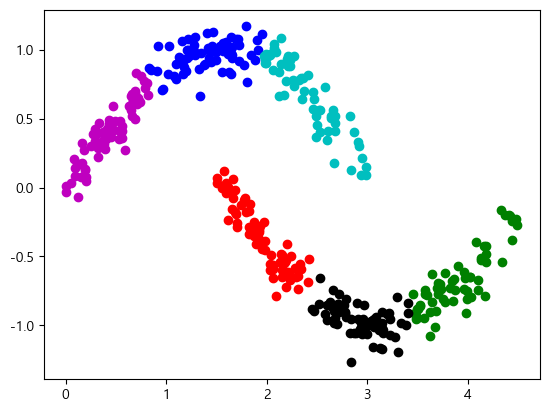

In [304]:
model = KMeans(n_clusters=6, n_init=10, init='k-means++')
model.fit(data[:,:-1])
centers = model.cluster_centers_
colors = ['r','g','b','c','m','k']
for i in range(len(colors)):
    plt.scatter(data[model.labels_ == i, 0], data[model.labels_ == i,1], c=colors[i])